In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
churndata = pd.read_csv('data/customer-churn-data.csv')
churndata

,Gender,Age,Payment Method,Churn,LastTransaction
0,male,64,credit card,loyal,98
1,male,35,cheque,churn,118
2,female,25,credit card,loyal,107
3,female,39,credit card,NaN,177
4,male,39,credit card,loyal,90
...,...,...,...,...,...
991,female,29,credit card,loyal,33
992,male,84,credit card,loyal,124
993,male,20,credit card,NaN,60
994,male,19,credit card,loyal,49


In [3]:
churndata.isna().sum()

Gender              0
Age                 0
Payment Method      0
Churn              96
LastTransaction     0
dtype: int64

In [4]:
churndata.Age = pd.cut(churndata.Age,bins=[0,18,65,79,99],labels=['Child','Young','Adult','Elderly'])

In [5]:
print(len(churndata[churndata.Age=="Child"]))
print(len(churndata[churndata.Age=="Young"]))
print(len(churndata[churndata.Age=="Adult"]))
print(len(churndata[churndata.Age=="Elderly"]))

50
777
116
53


In [6]:
# label encoder
le = LabelEncoder()

churndata['Gender'] = le.fit_transform(churndata['Gender'])
churndata['Age'] = le.fit_transform(churndata['Age'])
churndata['Payment Method'] = le.fit_transform(churndata['Payment Method'])

In [7]:
print("Churn",set(list(churndata['Churn'])))
churndata.dropna(how='any', inplace=True)

Churn {'churn', nan, 'loyal'}


In [8]:
churndata

,Gender,Age,Payment Method,Churn,LastTransaction
0,1,3,2,loyal,98
1,1,3,1,churn,118
2,0,3,2,loyal,107
4,1,3,2,loyal,90
5,0,3,1,churn,189
...,...,...,...,...,...
990,1,3,2,loyal,92
991,0,3,2,loyal,33
992,1,2,2,loyal,124
994,1,3,2,loyal,49


In [9]:
churndata['Churn'] = le.fit_transform(churndata['Churn'])

In [10]:
churndata

,Gender,Age,Payment Method,Churn,LastTransaction
0,1,3,2,1,98
1,1,3,1,0,118
2,0,3,2,1,107
4,1,3,2,1,90
5,0,3,1,0,189
...,...,...,...,...,...
990,1,3,2,1,92
991,0,3,2,1,33
992,1,2,2,1,124
994,1,3,2,1,49


In [11]:
y = to_categorical(churndata["Churn"])

churndata = churndata.drop(['Churn'],1)

# Scaled feature 
standardisation = StandardScaler()  
churndata = standardisation.fit_transform(churndata) 
  
print ("\nAfter Standardisation : \n", churndata) 

X = churndata
X, y


After Standardisation : 
 [[ 0.90860212  0.48772432  0.71741751 -0.28876926]
 [ 0.90860212  0.48772432 -0.39581656  0.15735954]
 [-1.10059176  0.48772432  0.71741751 -0.0880113 ]
 ...
 [ 0.90860212 -0.49868442  0.71741751  0.29119818]
 [ 0.90860212  0.48772432  0.71741751 -1.38178481]
 [-1.10059176  0.48772432  0.71741751 -1.91713937]]


(array([[ 0.90860212,  0.48772432,  0.71741751, -0.28876926],
        [ 0.90860212,  0.48772432, -0.39581656,  0.15735954],
        [-1.10059176,  0.48772432,  0.71741751, -0.0880113 ],
        ...,
        [ 0.90860212, -0.49868442,  0.71741751,  0.29119818],
        [ 0.90860212,  0.48772432,  0.71741751, -1.38178481],
        [-1.10059176,  0.48772432,  0.71741751, -1.91713937]]),
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))

X_train 720
X_test 180
y_train 720
y_test 180


In [13]:
#get number of columns in training data
n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # for binary classification

In [14]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/200
18/18 [==============================] - 0s 12ms/step - loss: 0.5940 - accuracy: 0.7448 - val_loss: 0.4633 - val_accuracy: 0.8194
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.8021 - val_loss: 0.4422 - val_accuracy: 0.8264
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8056 - val_loss: 0.4281 - val_accuracy: 0.8333
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4432 - accuracy: 0.7969 - val_loss: 0.4384 - val_accuracy: 0.8264
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4445 - accuracy: 0.8108 - val_loss: 0.4347 - val_accuracy: 0.8194
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4372 - accuracy: 0.8108 - val_loss: 0.4352 - val_accuracy: 0.8264
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.8073 - val_loss: 0.4326 - val_accuracy: 0.8264
Epoch 8/200


Epoch 59/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.8177 - val_loss: 0.4213 - val_accuracy: 0.8194
Epoch 60/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8142 - val_loss: 0.4280 - val_accuracy: 0.8333
Epoch 61/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4069 - accuracy: 0.8108 - val_loss: 0.4281 - val_accuracy: 0.8333
Epoch 62/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4046 - accuracy: 0.8177 - val_loss: 0.4232 - val_accuracy: 0.8333
Epoch 63/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4098 - accuracy: 0.8142 - val_loss: 0.4272 - val_accuracy: 0.8333
Epoch 64/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8177 - val_loss: 0.4207 - val_accuracy: 0.8264
Epoch 65/200
18/18 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8160 - val_loss: 0.4304 - val_accuracy: 0.8264
Epoch 

18/18 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.8229 - val_loss: 0.4434 - val_accuracy: 0.8194
Epoch 117/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8229 - val_loss: 0.4385 - val_accuracy: 0.8194
Epoch 118/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8212 - val_loss: 0.4400 - val_accuracy: 0.8333
Epoch 119/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3996 - accuracy: 0.8247 - val_loss: 0.4408 - val_accuracy: 0.8264
Epoch 120/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3970 - accuracy: 0.8142 - val_loss: 0.4396 - val_accuracy: 0.8125
Epoch 121/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3950 - accuracy: 0.8194 - val_loss: 0.4426 - val_accuracy: 0.8264
Epoch 122/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.8281 - val_loss: 0.4384 - val_accuracy: 0.8333
Epoch 123/200

18/18 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.8264 - val_loss: 0.4518 - val_accuracy: 0.8125
Epoch 174/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8299 - val_loss: 0.4545 - val_accuracy: 0.8264
Epoch 175/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8316 - val_loss: 0.4518 - val_accuracy: 0.8125
Epoch 176/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8264 - val_loss: 0.4590 - val_accuracy: 0.8056
Epoch 177/200
18/18 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8299 - val_loss: 0.4507 - val_accuracy: 0.8264
Epoch 178/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8316 - val_loss: 0.4562 - val_accuracy: 0.8125
Epoch 179/200
18/18 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.8281 - val_loss: 0.4506 - val_accuracy: 0.8125
Epoch 180/200

In [15]:
classes = model.predict(X_test, batch_size=128, verbose=1)
classes

2/2 [==============================] - 0s 827us/step


array([[0.87330025, 0.12669976],
       [0.01474488, 0.9852551 ],
       [0.86030465, 0.13969536],
       [0.01211079, 0.98788923],
       [0.9920546 , 0.00794549],
       [0.15404208, 0.8459579 ],
       [0.5616135 , 0.4383865 ],
       [0.05692915, 0.9430709 ],
       [0.01749116, 0.9825088 ],
       [0.96631694, 0.03368311],
       [0.1420589 , 0.8579411 ],
       [0.32009494, 0.6799051 ],
       [0.02473252, 0.97526747],
       [0.8353815 , 0.1646185 ],
       [0.1418607 , 0.85813934],
       [0.7483534 , 0.2516466 ],
       [0.00531801, 0.994682  ],
       [0.26206514, 0.7379348 ],
       [0.19814034, 0.8018596 ],
       [0.05664399, 0.943356  ],
       [0.04768329, 0.95231664],
       [0.03407369, 0.9659263 ],
       [0.63237983, 0.3676201 ],
       [0.05149471, 0.9485053 ],
       [0.855093  , 0.14490698],
       [0.8315615 , 0.16843851],
       [0.31893772, 0.6810623 ],
       [0.48997006, 0.51003   ],
       [0.60840386, 0.39159614],
       [0.04768329, 0.95231664],
       [0.

In [16]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

2/2 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8111


[0.46337467432022095, 0.8111110925674438]

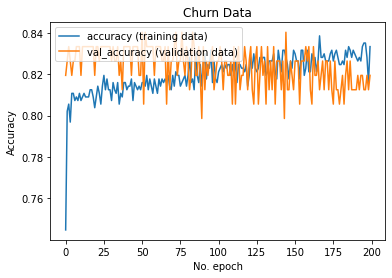

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='val_accuracy (validation data)')
plt.title('Churn Data')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

pred = clf_forest.predict(X_train)
print("Training accuracy", accuracy_score(y_train, pred))

pred_test = clf_forest.predict(X_test)
print("Test accuracy",accuracy_score(y_test, pred_test))

Training accuracy 0.925
Test accuracy 0.7888888888888889
